In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df_embedded_beam = pd.read_csv('Results_embedded_beam.csv')
df_soil = pd.read_csv('Results_soil.csv')

print(df_embedded_beam.head())
print(df_soil.head())

   Phase       x         y        Ux        Uy      Utot      PUx       PUy  \
0      4  1.2375 -1.154000 -0.221114 -0.197706  0.296612 -0.00001 -0.000099   
1      4  1.2375 -1.179339 -0.221976 -0.196981  0.296774 -0.00001 -0.000099   
2      4  1.2375 -1.204679 -0.222825 -0.196259  0.296932 -0.00001 -0.000099   
3      4  1.2375 -1.230018 -0.223663 -0.195539  0.297087 -0.00001 -0.000099   
4      4  1.2375 -1.255357 -0.224488 -0.194821  0.297238 -0.00001 -0.000099   

    PUtot         N  ...       UC6       UC7       UC8       UC9  UC10  UC11  \
0  0.0001  0.070173  ...  0.000029  0.000029  0.000029  0.000033   0.0   0.0   
1  0.0001  0.066831  ...  0.000034  0.000034  0.000034  0.000032   0.0   0.0   
2  0.0001  0.063487  ...  0.000038  0.000038  0.000038  0.000030   0.0   0.0   
3  0.0001  0.060143  ...  0.000041  0.000041  0.000041  0.000027   0.0   0.0   
4  0.0001  0.056801  ...  0.000044  0.000044  0.000044  0.000025   0.0   0.0   

   UC12      UC13      UC14  UC_governing  


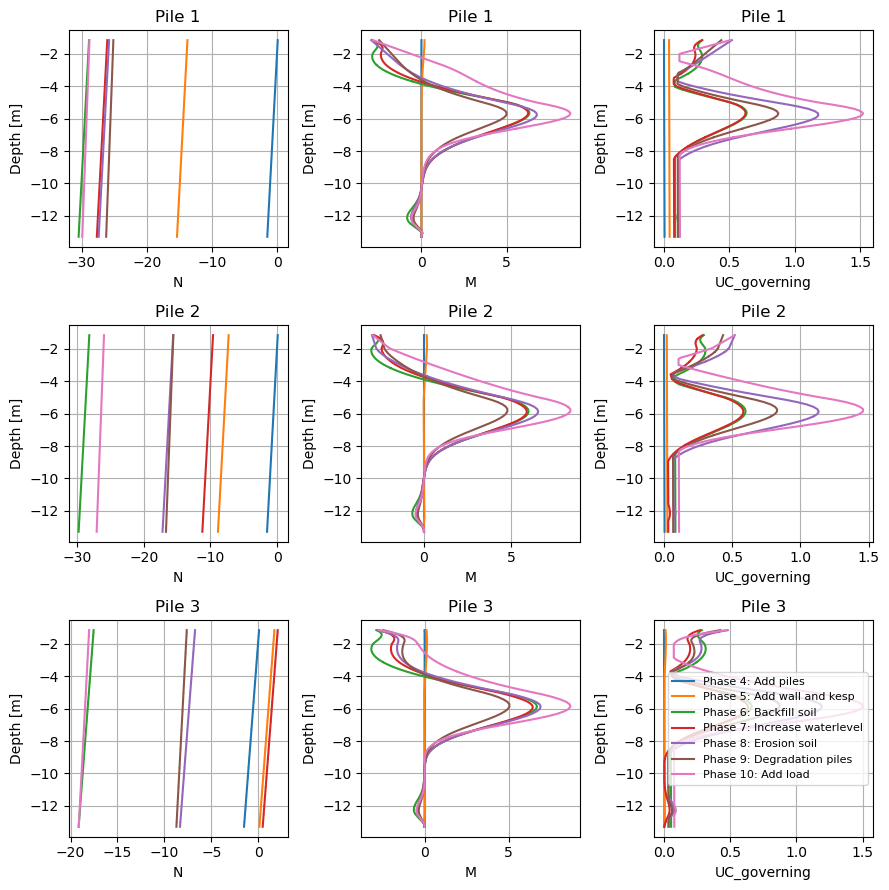

In [122]:
phases_plot = np.arange(4, 10+1, 1)
labels = ['Phase 4: Add piles',
          'Phase 5: Add wall and kesp',
          'Phase 6: Backfill soil',
          'Phase 7: Increase waterlevel',
          'Phase 8: Erosion soil',
          'Phase 9: Degradation piles',
          'Phase 10: Add load']
piles = np.arange(1, 3+1, 1)
selected_plots = ["N", "M", "UC_governing"]

plt.figure(figsize=(9, 9))

for i in range(len(piles)):
    pile = piles[i]

    for j in range(len(selected_plots)):
        property = selected_plots[j]

        plt.subplot(len(selected_plots), len(piles), i*len(selected_plots) + j  + 1)
        plt.grid()
        
        for phase in phases_plot:
            phase = phase
            x_plot = df_embedded_beam[property][df_embedded_beam["pilenumber"]==pile][df_embedded_beam["Phase"]==phase]
            y_plot = df_embedded_beam['y'][df_embedded_beam["pilenumber"]==pile][df_embedded_beam["Phase"]==phase]
            plt.plot(x_plot, y_plot, label=f'{labels[phase-4]}')

        plt.xlabel(property)
        plt.ylabel('Depth [m]')
        plt.title(f'Pile {pile}')

        if pile == piles[-1] and property == selected_plots[-1]:
            plt.legend(fontsize = 8, loc='best')

plt.tight_layout()

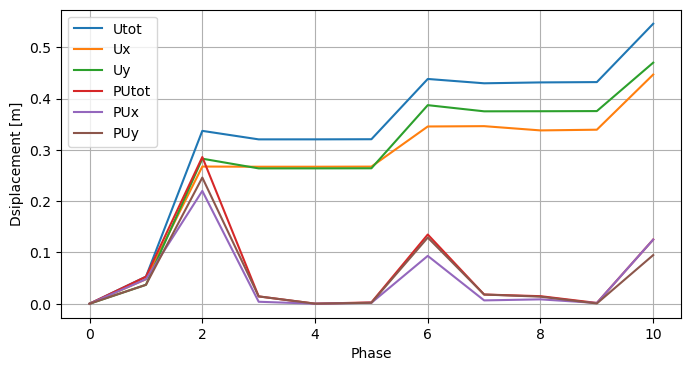

In [123]:
soil_property = ["Utot", "Ux", "Uy", "PUtot", "PUx", "PUy"]
soil_phases = np.arange(0, 10+1, 1)

plt.figure(figsize=(8, 4))

soil_array = np.zeros((len(soil_property), len(soil_phases)))

for j in range(len(soil_property)):
    for i in range(len(soil_phases)):
        soil_array[j,i] = np.max(abs(df_soil[soil_property[j]][df_soil["Phase"]==soil_phases[i]]))

    plt.plot(soil_phases, soil_array[j,:], label=f'{soil_property[j]}')

plt.grid()
plt.xlabel('Phase')
plt.ylabel('Dsiplacement [m]')
plt.legend(loc='best')

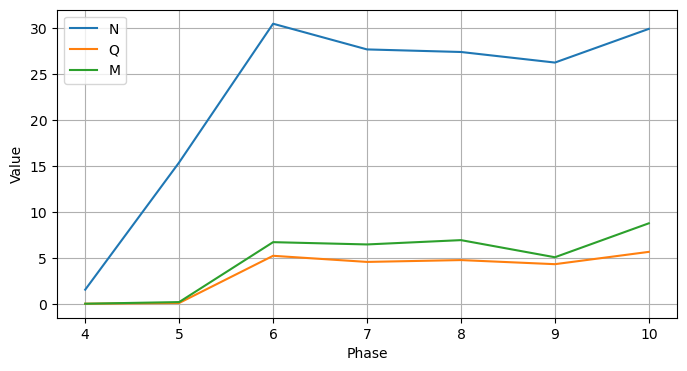

In [124]:
emb_property = ["N", "Q", "M"]
emb_phases = np.arange(4, 10+1, 1)

plt.figure(figsize=(8, 4))

emb_array = np.zeros((len(emb_property), len(emb_phases)))

for j in range(len(emb_property)):
    for i in range(len(emb_phases)):
        emb_array[j,i] = np.max(abs(df_embedded_beam[emb_property[j]][df_embedded_beam["Phase"]==emb_phases[i]]))

    plt.plot(emb_phases, emb_array[j,:], label=f'{emb_property[j]}')

plt.grid()
plt.xlabel('Phase')
plt.ylabel('Value')
plt.legend(loc='best')